## 1	Sentimental Analysis
Sentimental analysis is the process of determining whether a piece of writing is positive, negative, or neutral. The below Algorithm is designed for use in Financial Texts. It consists of steps:
 

In [1]:
import pandas as pd 
import numpy as np
import os   
import re
import nltk            
from collections import Counter 
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords 
from nltk import download  
import spacy 
from textblob import TextBlob
import textstat
from typing import Set
from typing import Set, Dict
download('stopwords')
download('punkt')
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\abhis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def load_stop_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stop_words = set(word.strip() for word in file.readlines())
    return stop_words

In [3]:
def load_word_list(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        words = set(word.strip() for word in file.readlines())
    return words

In [4]:
stop_words_path = r'C:\Users\abhis\Desktop\projects task\Stop Words\StopWords_Generic.txt'
positive_words_path = r'C:\Users\abhis\Desktop\projects task\master dictionary\positive-words.txt'
negative_words_path = r'C:\Users\abhis\Desktop\projects task\master dictionary\negative-words.txt'
directory_path = r'C:\Users\abhis\Desktop\projects task\extracted_articles'

In [5]:
def load_stop_words(file_path):
    """
    Load stop words from a file and return a set of words.
    
    Parameters:
    file_path (str): The path to the stop words file.
    
    Returns:
    set: A set of stop words.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            stop_words = set(word.strip() for word in file.readlines())
    except UnicodeDecodeError:
        # Try a different encoding if UTF-8 fails
        with open(file_path, 'r', encoding='ISO-8859-1') as file:
            stop_words = set(word.strip() for word in file.readlines())
    return stop_words

In [6]:
def load_word_list(file_path):
    """
    Load a list of words from a file and return a set of words.
    
    Parameters:
    file_path (str): The path to the word list file.
    
    Returns:
    set: A set of words from the file.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            words = set(word.strip() for word in file.readlines())
    except UnicodeDecodeError:
        # Try a different encoding if UTF-8 fails
        with open(file_path, 'r', encoding='ISO-8859-1') as file:
            words = set(word.strip() for word in file.readlines())
    return words

In [7]:
stop_words = load_stop_words(stop_words_path)
positive_words = load_word_list(positive_words_path)
negative_words = load_word_list(negative_words_path)

In [8]:
def preprocess_text(text):
    """
    Preprocess text by removing stop words and punctuation.
    
    Parameters:
    text (str): The text to preprocess.
    
    Returns:
    str: The preprocessed text.
    """
    doc = nlp(text)
    filtered_tokens = [token.text.lower() for token in doc if token.text.lower() not in stop_words and not token.is_punct]
    return ' '.join(filtered_tokens)

In [9]:
def calculate_sentiment_scores(text):
    """
    Calculate sentiment scores including Positive Score, Negative Score,
    Polarity Score, and Subjectivity Score.
    
    Parameters:
    text (str): The text to analyze.
    
    Returns:
    dict: A dictionary with sentiment scores.
    """
    # Preprocess the text
    preprocessed_text = preprocess_text(text)
    
    # Initialize scores
    positive_score = 0
    negative_score = 0
    
    # Tokenize the preprocessed text
    tokens = preprocessed_text.split()
    
    for token in tokens:
        if token in positive_words:
            positive_score += 1
        elif token in negative_words:
            negative_score += 1
    
    # Calculate polarity and subjectivity scores
    polarity_score = (positive_score - negative_score) / (positive_score + negative_score + 0.000001)
    subjectivity_score = (positive_score + negative_score) / (len(tokens) + 0.000001)
    
    sentiment_scores = {
        'positive_score': positive_score,
        'negative_score': negative_score,
        'polarity_score': polarity_score,
        'subjectivity_score': subjectivity_score
    }
    
    return sentiment_scores

In [10]:
def analyze_sentiment_directory(directory_path):
    """
    Analyze sentiment of all text files in a directory.
    
    Parameters:
    directory_path (str): The path to the directory containing text files.
    
    Returns:
    pd.DataFrame: A DataFrame with sentiment analysis results for each document.
    """
    results = []
    
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):
            file_path = os.path.join(directory_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()
                
            sentiment_scores = calculate_sentiment_scores(text)
            results.append({'file_name': filename, **sentiment_scores})
    
    return pd.DataFrame(results)
results_df = analyze_sentiment_directory(directory_path)
print(results_df)

          file_name  positive_score  negative_score  polarity_score  \
0    bctech2011.txt             141              43        0.532609   
1    bctech2012.txt              25               5        0.666667   
2    bctech2013.txt              31              10        0.512195   
3    bctech2014.txt              23               7        0.533333   
4    bctech2015.txt              23               3        0.769231   
..              ...             ...             ...             ...   
142  bctech2153.txt              20               8        0.428571   
143  bctech2154.txt              29              20        0.183673   
144  bctech2155.txt              18              11        0.241379   
145  bctech2156.txt               7               0        1.000000   
146  bctech2157.txt               8               0        1.000000   

     subjectivity_score  
0              0.067897  
1              0.048860  
2              0.054667  
3              0.047468  
4              0.

## 1.1	Cleaning using Stop Words Lists
The Stop Words Lists (found in the folder StopWords) are used to clean the text so that Sentiment Analysis can be performed by excluding the words found in Stop Words List. 


In [11]:
def load_stop_words(file_path: str) -> Set[str]:
    """Load stop words from a file into a set."""
    with open(file_path, 'r', encoding='utf-8') as file:
        stop_words = set(word.strip().lower() for word in file.readlines())
    return stop_words

In [12]:
def remove_stop_words(text: str, stop_words: Set[str]) -> str:
    """Remove stop words from the given text."""
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [13]:
stop_words_path = 'C:\\Users\\abhis\\Desktop\\projects task\\Stop Words\\StopWords_Generic.txt'
stop_words = load_stop_words(stop_words_path)

In [14]:
text = "This is a  text that needs to be cleaned of stop words."
cleaned_text = remove_stop_words(text, stop_words)
print(cleaned_text)


a text needs cleaned stop words.


In [15]:
def process_files(input_directory: str, output_directory: str, stop_words: Set[str]):
    """Process text files in the input directory, clean them by removing stop words, and save the cleaned text to the output directory."""
    os.makedirs(output_directory, exist_ok=True)
    for filename in os.listdir(input_directory):
        if filename.endswith('.txt'):  # Process only .txt files
            input_file_path = os.path.join(input_directory, filename)
            output_file_path = os.path.join(output_directory, filename)
            
            with open(input_file_path, 'r', encoding='utf-8') as file:
                text = file.read()
            
            # Clean the text
            cleaned_text = remove_stop_words(text, stop_words)
            
            with open(output_file_path, 'w', encoding='utf-8') as file:
                file.write(cleaned_text)

In [16]:
stop_words_path = 'C:\\Users\\abhis\\Desktop\\projects task\\Stop Words\\StopWords_Generic.txt'
input_directory = 'C:\\Users\\abhis\\Desktop\\projects task\\extracted_articles'
output_directory = 'C:\\Users\\abhis\\Desktop\\projects task\\cleaned_articles'

In [17]:
stop_words = load_stop_words(stop_words_path)

In [18]:
process_files(input_directory, output_directory, stop_words)

## 1.2	Creating a dictionary of Positive and Negative words
The Master Dictionary (found in the folder MasterDictionary) is used for creating a dictionary of Positive and Negative words. We add only those words in the dictionary if they are not found in the Stop Words Lists. 


In [19]:
def load_word_list(file_path: str, stop_words: Set[str]) -> Set[str]:
    """Load words from a file into a set, excluding stop words."""
    with open(file_path, 'r', encoding='utf-8') as file:
        words = set(word.strip().lower() for word in file.readlines() if word.strip().lower() not in stop_words)
    return words

In [20]:
stop_words_path = 'C:\\Users\\abhis\\Desktop\\projects task\\Stop Words\\StopWords_Generic.txt'
positive_words_path = 'C:\\Users\\abhis\\Desktop\\projects task\\master dictionary\\positive-words.txt'
negative_words_path = 'C:\\Users\\abhis\\Desktop\\projects task\\master dictionary\\negative-words.txt'

In [21]:
stop_words = load_stop_words(stop_words_path)

In [23]:
positive_words = load_word_list(positive_words_path, stop_words)
negative_words = load_word_list(negative_words_path, stop_words)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xef in position 3988: invalid continuation byte

In [24]:
positive_words = load_word_list(positive_words_path, stop_words)
negative_words = load_word_list(negative_words_path, stop_words)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xef in position 3988: invalid continuation byte

In [25]:
def load_words_with_fallback(file_path: str, stop_words: Set[str], encodings: list) -> Set[str]:
    """Load words from a file into a set, excluding stop words, with encoding fallback."""
    words = set()
    for encoding in encodings:
        try:
            with open(file_path, 'r', encoding=encoding) as file:
                words = set(word.strip().lower() for word in file.readlines() if word.strip().lower() not in stop_words)
            return words  # Return words if successful
        except (UnicodeDecodeError, IOError) as e:
            print("Failed to read file {} with encoding {}: {}".format(file_path, encoding, e))
    raise ValueError("All encodings failed for file: {}".format(file_path))

In [26]:
def load_stop_words(file_path: str) -> Set[str]:
    """Load stop words from a file into a set with encoding fallback."""
    encodings = ['utf-8', 'iso-8859-1', 'cp1252']
    return load_words_with_fallback(file_path, set(), encodings)

In [27]:
def load_word_list(file_path: str, stop_words: Set[str]) -> Set[str]:
    """Load positive or negative words from a file into a set, excluding stop words, with encoding fallback."""
    encodings = ['utf-8', 'iso-8859-1', 'cp1252']
    return load_words_with_fallback(file_path, stop_words, encodings)

In [28]:
stop_words_path = 'C:\\Users\\abhis\\Desktop\\projects task\\Stop Words\\StopWords_Generic.txt'
positive_words_path = 'C:\\Users\\abhis\\Desktop\\projects task\\master dictionary\\positive-words.txt'
negative_words_path = 'C:\\Users\\abhis\\Desktop\\projects task\\master dictionary\\negative-words.txt'

In [29]:
stop_words = load_stop_words(stop_words_path)

In [30]:
positive_words = load_word_list(positive_words_path, stop_words)
negative_words = load_word_list(negative_words_path, stop_words)

Failed to read file C:\Users\abhis\Desktop\projects task\master dictionary\negative-words.txt with encoding utf-8: 'utf-8' codec can't decode byte 0xef in position 3988: invalid continuation byte


using another method

In [31]:
def load_stop_words(file_paths):
    """
    Load stop words from multiple files into a set.
    """
    stop_words = set()
    for file_path in file_paths:
        try:
            with open(file_path, 'r', encoding='iso-8859-1') as file:
                stop_words.update(word.strip().lower() for word in file.readlines())
        except UnicodeDecodeError as e:
            print(f"Failed to read file {file_path} with encoding iso-8859-1: {e}")
    return stop_words

In [32]:
def load_word_list(file_path, stop_words):
    """
    Load words from a file into a set, excluding stop words.
    """
    words = set()
    try:
        with open(file_path, 'r', encoding='iso-8859-1') as file:
            words.update(word.strip().lower() for word in file.readlines() if word.strip().lower() not in stop_words)
    except UnicodeDecodeError as e:
        print(f"Failed to read file {file_path} with encoding iso-8859-1: {e}")
    return words

In [33]:
stop_words_files = [
    r'C:\Users\abhis\Desktop\projects task\Stop Words\StopWords_Generic.txt',
    
]

In [34]:
positive_words_path = r'C:\Users\abhis\Desktop\projects task\master dictionary\positive-words.txt'
negative_words_path = r'C:\Users\abhis\Desktop\projects task\master dictionary\negative-words.txt'

In [35]:
stop_words = load_stop_words(stop_words_files)

In [36]:
positive_words = load_word_list(positive_words_path, stop_words)
negative_words = load_word_list(negative_words_path, stop_words)

In [37]:
print("Positive words count: {}".format(len(positive_words)))
print("Negative words count: {}".format(len(negative_words)))

Positive words count: 2006
Negative words count: 4783


In [38]:
def save_words_to_file(words, file_path):
    """
    Save a set of words to a file.
    """
    with open(file_path, 'w', encoding='utf-8') as file:
        for word in sorted(words):
            file.write(f"{word}\n")

In [39]:
save_words_to_file(positive_words, r'C:\Users\abhis\Desktop\projects task\master dictionary\cleaned_positive_words.txt')
save_words_to_file(negative_words, r'C:\Users\abhis\Desktop\projects task\master dictionary\cleaned_negative_words.txt')

## 1.3	Extracting Derived variables

In [40]:
import logging
import csv
import matplotlib.pyplot as plt
logging.basicConfig(filename='sentiment_analysis.log', level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

In [41]:
try:
    nlp = spacy.load('en_core_web_sm')
    logging.info('spaCy model loaded successfully.')
except Exception as e:
    logging.error(f'Failed to load spaCy model: {e}')
    raise

In [42]:
def load_word_list(file_path, encoding='iso-8859-1'):
    try:
        with open(file_path, 'r', encoding=encoding) as file:
            words = set(word.strip().lower() for word in file.readlines())
        logging.info(f'Loaded word list from {file_path}')
        return words
    except Exception as e:
        logging.error(f'Error loading word list from {file_path}: {e}')
        raise

In [43]:
def calculate_sentiment_variables(text):
    doc = nlp(text.lower())
    
    # Tokenize and filter words (ignore stop words)
    tokens = [token.text for token in doc if token.is_alpha and token.text not in stop_words]
    
    # Calculate Positive and Negative Scores
    positive_score = sum(1 for token in tokens if token in positive_words)
    negative_score = sum(1 for token in tokens if token in negative_words) * -1
    try:
        polarity_score = (positive_score - negative_score) / ((positive_score + abs(negative_score)) + 0.000001)
    except ZeroDivisionError:
        polarity_score = 0  # Handle division by zero if both scores are zero
    
    # Subjectivity Score
    total_words = len(tokens)
    subjectivity_score = (positive_score + abs(negative_score)) / (total_words + 0.000001) if total_words > 0 else 0
    
    return {
        'Positive Score': positive_score,
        'Negative Score': abs(negative_score),
        'Polarity Score': polarity_score,
        'Subjectivity Score': subjectivity_score,
        'Token Count': total_words
    }

In [44]:
def analyze_articles(directory_path):
    results = []
    all_tokens = []
    for article_file in os.listdir(directory_path):
        if article_file.endswith('.txt'):  # Assuming the articles are in .txt format
            try:
                with open(os.path.join(directory_path, article_file), 'r', encoding='utf-8') as file:
                    text = file.read()
                    sentiment_scores = calculate_sentiment_variables(text)
                    results.append({
                        'Article': article_file,
                        'Sentiment Scores': sentiment_scores
                    })
                    all_tokens.extend([token for token in text.lower().split() if token.isalpha() and token not in stop_words])
            except Exception as e:
                logging.error(f"Error reading {article_file}: {e}")
    return results, all_tokens

In [45]:
def save_results_to_csv(results, output_file_path):
    try:
        with open(output_file_path, 'w', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow(['Article', 'Positive Score', 'Negative Score', 'Polarity Score', 'Subjectivity Score', 'Token Count'])
            for result in results:
                article = result['Article']
                sentiment_scores = result['Sentiment Scores']
                writer.writerow([
                    article,
                    sentiment_scores['Positive Score'],
                    sentiment_scores['Negative Score'],
                    sentiment_scores['Polarity Score'],
                    sentiment_scores['Subjectivity Score'],
                    sentiment_scores['Token Count']
                ])
        logging.info(f'Results saved to {output_file_path}')
    except Exception as e:
        logging.error(f'Error saving results to {output_file_path}: {e}')
        raise

In [46]:
def generate_word_frequency_visualization(tokens, output_file_path):
    try:
        word_counts = Counter(tokens)
        common_words = word_counts.most_common(20)
        words, counts = zip(*common_words)
        
        plt.figure(figsize=(10, 8))
        plt.bar(words, counts)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.title('Top 20 Most Common Words')
        plt.tight_layout()
        plt.savefig(output_file_path)
        logging.info(f'Word frequency visualization saved to {output_file_path}')
    except Exception as e:
        logging.error(f'Error generating word frequency visualization: {e}')
        raise

In [47]:
directory_path = r'C:\Users\abhis\Desktop\projects task\extracted_articles'
output_csv_path = r'C:\Users\abhis\Desktop\projects task\sentiment_analysis_results.csv'
word_freq_viz_path = r'C:\Users\abhis\Desktop\projects task\word_frequency_visualization.png'

In [48]:
analysis_results, all_tokens = analyze_articles(directory_path)

In [49]:
save_results_to_csv(analysis_results, output_csv_path)

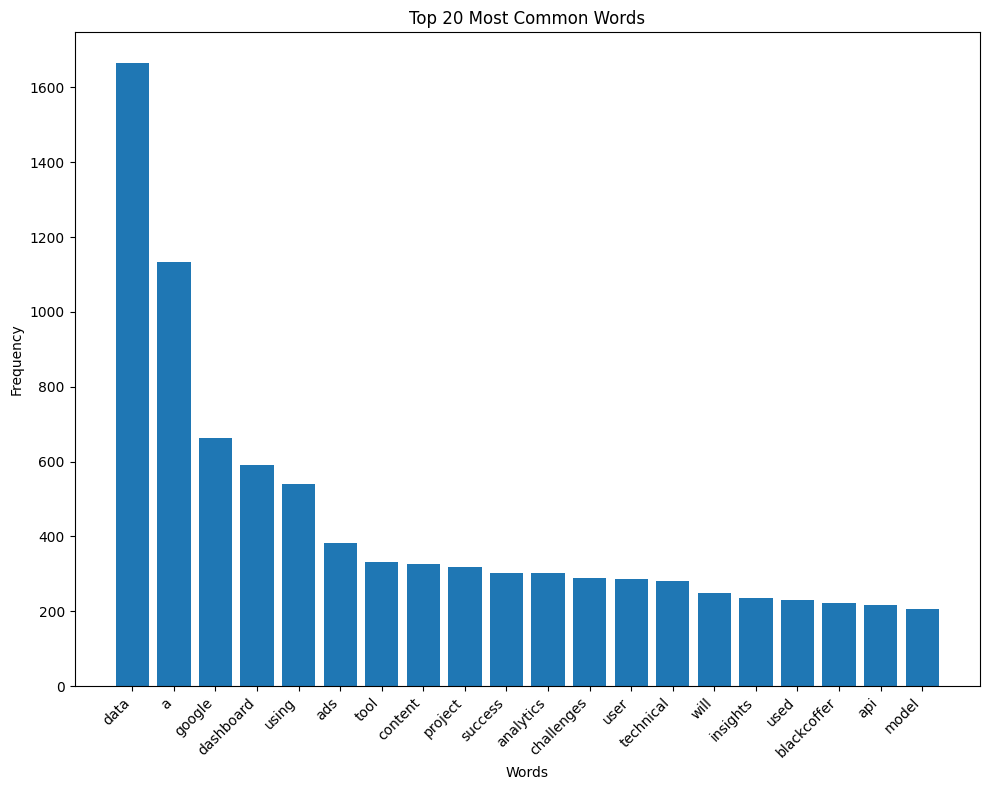

In [50]:
generate_word_frequency_visualization(all_tokens, word_freq_viz_path)

In [51]:
for result in analysis_results:
    print(f"Article: {result['Article']}")
    print(f"Sentiment Scores:")
    print(f"  Positive Score: {result['Sentiment Scores']['Positive Score']}")
    print(f"  Negative Score: {result['Sentiment Scores']['Negative Score']}")
    print(f"  Polarity Score: {result['Sentiment Scores']['Polarity Score']}")
    print(f"  Subjectivity Score: {result['Sentiment Scores']['Subjectivity Score']}")
    print(f"  Token Count: {result['Sentiment Scores']['Token Count']}")
    print("\n")

Article: bctech2011.txt
Sentiment Scores:
  Positive Score: 116
  Negative Score: 38
  Polarity Score: 0.9999999935064936
  Subjectivity Score: 0.08840413312950393
  Token Count: 1742


Article: bctech2012.txt
Sentiment Scores:
  Positive Score: 22
  Negative Score: 4
  Polarity Score: 0.9999999615384629
  Subjectivity Score: 0.06989247293039658
  Token Count: 372


Article: bctech2013.txt
Sentiment Scores:
  Positive Score: 29
  Negative Score: 9
  Polarity Score: 0.9999999736842113
  Subjectivity Score: 0.07569721100458723
  Token Count: 502


Article: bctech2014.txt
Sentiment Scores:
  Positive Score: 19
  Negative Score: 5
  Polarity Score: 0.999999958333335
  Subjectivity Score: 0.0629921258189183
  Token Count: 381


Article: bctech2015.txt
Sentiment Scores:
  Positive Score: 19
  Negative Score: 3
  Polarity Score: 0.9999999545454565
  Subjectivity Score: 0.04856512130559576
  Token Count: 453


Article: bctech2016.txt
Sentiment Scores:
  Positive Score: 15
  Negative Score: 6
 

## 2	Analysis of Readability

In [52]:
logging.basicConfig(filename='readability_analysis.log', level=logging.DEBUG, format='%(asctime)s - %"(levelname)s - %(message)s')

In [53]:
try:
    nlp = spacy.load('en_core_web_sm')
    logging.info('spaCy model loaded successfully.')
except Exception as e:
    logging.error(f'Failed to load spaCy model: {e}')
    raise

In [54]:
def calculate_readability_metrics(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if token.is_alpha]
    sentences = [sent.text for sent in doc.sents]
    num_sentences = len(sentences)
    num_words = len(tokens)
    average_sentence_length = num_words / (num_sentences + 0.000001)  # Avoid division by zero
    complex_words = [word for word in tokens if len(word) > 2]
    num_complex_words = len(complex_words)
    percentage_complex_words = num_complex_words / (num_words + 0.000001)
    
    # Fog Index
    fog_index = 0.4 * (average_sentence_length + percentage_complex_words)
    
    return {
        'Token Count': num_words,
        'Average Sentence Length': average_sentence_length,
        'Percentage of Complex Words': percentage_complex_words,
        'Fog Index': fog_index
    }

In [55]:
def analyze_articles_for_readability(directory_path):
    results = []
    for article_file in os.listdir(directory_path):
        if article_file.endswith('.txt'):  # Assuming the articles are in .txt format
            try:
                with open(os.path.join(directory_path, article_file), 'r', encoding='utf-8') as file:
                    text = file.read()
                    metrics = calculate_readability_metrics(text)
                    results.append({
                        'Article': article_file,
                        'Readability Metrics': metrics
                    })
            except Exception as e:
                logging.error(f"Error reading {article_file}: {e}")
    return results

In [56]:
def save_readability_results_to_csv(results, output_file_path):
    try:
        with open(output_file_path, 'w', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow([
                'Article', 'Token Count', 'Average Sentence Length', 'Percentage of Complex Words', 'Fog Index'
            ])
            for result in results:
                article = result['Article']
                metrics = result['Readability Metrics']
                writer.writerow([
                    article,
                    metrics['Token Count'],
                    metrics['Average Sentence Length'],
                    metrics['Percentage of Complex Words'],
                    metrics['Fog Index']
                ])
        logging.info(f'Readability results saved to {output_file_path}')
    except Exception as e:
        logging.error(f'Error saving readability results to {output_file_path}: {e}')
        raise

In [57]:
output_csv_path = r'C:\Users\abhis\Desktop\projects task\readability_analysis_results.csv'

In [58]:
readability_results = analyze_articles_for_readability(directory_path)
save_readability_results_to_csv(readability_results, output_csv_path)

In [59]:
for result in readability_results:
    print(f"Article: {result['Article']}")
    print(f"Readability Metrics:")
    print(f"  Token Count: {result['Readability Metrics']['Token Count']}")
    print(f"  Average Sentence Length: {result['Readability Metrics']['Average Sentence Length']}")
    print(f"  Percentage of Complex Words: {result['Readability Metrics']['Percentage of Complex Words']}")
    print(f"  Fog Index: {result['Readability Metrics']['Fog Index']}")
    print("\n")

Article: bctech2011.txt
Readability Metrics:
  Token Count: 2426
  Average Sentence Length: 115.52380402267599
  Percentage of Complex Words: 0.8742786476198358
  Fog Index: 46.55923306811833


Article: bctech2012.txt
Readability Metrics:
  Token Count: 496
  Average Sentence Length: 247.999876000062
  Percentage of Complex Words: 0.9274193529689126
  Fog Index: 99.57091814121236


Article: bctech2013.txt
Readability Metrics:
  Token Count: 655
  Average Sentence Length: 218.3332605555798
  Percentage of Complex Words: 0.9221374031723093
  Fog Index: 87.70215918350085


Article: bctech2014.txt
Readability Metrics:
  Token Count: 502
  Average Sentence Length: 167.33327755557414
  Percentage of Complex Words: 0.9382470100831732
  Fog Index: 67.30860982626292


Article: bctech2015.txt
Readability Metrics:
  Token Count: 636
  Average Sentence Length: 317.99984100007947
  Percentage of Complex Words: 0.8647798728541197
  Fog Index: 127.54584834917344


Article: bctech2016.txt
Readability 

## 	Average Number of Words Per Sentence

In [60]:
logging.basicConfig(filename='average_words_per_sentence.log', level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

In [61]:
try:
    nlp = spacy.load('en_core_web_sm')
    logging.info('spaCy model loaded successfully.')
except Exception as e:
    logging.error(f'Failed to load spaCy model: {e}')
    raise

In [62]:
def calculate_average_words_per_sentence(text):
    doc = nlp(text.lower())
    
    # Sentence analysis
    sentences = [sent.text for sent in doc.sents]
    num_sentences = len(sentences)
    num_words = len([token.text for token in doc if token.is_alpha])
    
    # Average Number of Words Per Sentence
    average_words_per_sentence = num_words / (num_sentences + 0.000001)  # Avoid division by zero
    
    return average_words_per_sentence

In [63]:
def analyze_articles_for_avg_words(directory_path):
    results = []
    for article_file in os.listdir(directory_path):
        if article_file.endswith('.txt'):  # Assuming the articles are in .txt format
            try:
                with open(os.path.join(directory_path, article_file), 'r', encoding='utf-8') as file:
                    text = file.read()
                    avg_words_per_sentence = calculate_average_words_per_sentence(text)
                    results.append({
                        'Article': article_file,
                        'Average Number of Words Per Sentence': avg_words_per_sentence
                    })
            except Exception as e:
                logging.error(f"Error reading {article_file}: {e}")
    return results

In [64]:
def save_avg_words_results_to_csv(results, output_file_path):
    try:
        with open(output_file_path, 'w', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow([
                'Article', 'Average Number of Words Per Sentence'
            ])
            for result in results:
                writer.writerow([
                    result['Article'],
                    result['Average Number of Words Per Sentence']
                ])
        logging.info(f'Average words per sentence results saved to {output_file_path}')
    except Exception as e:
        logging.error(f'Error saving average words per sentence results to {output_file_path}: {e}')
        raise

In [65]:
if __name__ == "__main__":
    directory_path = r'C:\Users\abhis\Desktop\projects task\extracted_articles'
    output_csv_path = r'C:\Users\abhis\Desktop\projects task\average_words_per_sentence_results.csv'

In [66]:
avg_words_results = analyze_articles_for_avg_words(directory_path)
save_avg_words_results_to_csv(avg_words_results, output_csv_path)

In [67]:
for result in avg_words_results:
        print(f"Article: {result['Article']}")
        print(f"Average Number of Words Per Sentence: {result['Average Number of Words Per Sentence']}")
        print("\n")

Article: bctech2011.txt
Average Number of Words Per Sentence: 115.52380402267599


Article: bctech2012.txt
Average Number of Words Per Sentence: 247.999876000062


Article: bctech2013.txt
Average Number of Words Per Sentence: 218.3332605555798


Article: bctech2014.txt
Average Number of Words Per Sentence: 167.33327755557414


Article: bctech2015.txt
Average Number of Words Per Sentence: 317.99984100007947


Article: bctech2016.txt
Average Number of Words Per Sentence: 231.999884000058


Article: bctech2017.txt
Average Number of Words Per Sentence: 131.99995600001466


Article: bctech2018.txt
Average Number of Words Per Sentence: 227.49988625005685


Article: bctech2019.txt
Average Number of Words Per Sentence: 81.42855979592002


Article: bctech2020.txt
Average Number of Words Per Sentence: 194.99995125001217


Article: bctech2021.txt
Average Number of Words Per Sentence: 248.99987550006225


Article: bctech2022.txt
Average Number of Words Per Sentence: 74.19999258000075


Article: bc

In [68]:
logging.basicConfig(filename='complex_word_count.log', level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

In [69]:
def count_complex_words(text):
    doc = nlp(text.lower())
    
    # Tokenize and filter words
    tokens = [token.text for token in doc if token.is_alpha]
    
    # Count complex words
    complex_word_count = 0
    for token in tokens:
        word = Word(token)
        if len(word.syllables) > 2:
            complex_word_count += 1
    
    return complex_word_count

In [70]:
def analyze_articles_for_complex_words(directory_path):
    results = []
    for article_file in os.listdir(directory_path):
        if article_file.endswith('.txt'):  # Assuming the articles are in .txt format
            try:
                with open(os.path.join(directory_path, article_file), 'r', encoding='utf-8') as file:
                    text = file.read()
                    complex_word_count = count_complex_words(text)
                    results.append({
                        'Article': article_file,
                        'Complex Word Count': complex_word_count
                    })
            except Exception as e:
                logging.error(f"Error reading {article_file}: {e}")
    return results

In [71]:
def save_complex_words_results_to_csv(results, output_file_path):
    try:
        with open(output_file_path, 'w', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
            writer.writerow([
                'Article', 'Complex Word Count'
            ])
            for result in results:
                writer.writerow([
                    result['Article'],
                    result['Complex Word Count']
                ])
        logging.info(f'Complex word count results saved to {output_file_path}')
    except Exception as e:
        logging.error(f'Error saving complex word count results to {output_file_path}: {e}')
        raise

In [72]:
if __name__ == "__main__":
    directory_path = r'C:\Users\abhis\Desktop\projects task\extracted_articles'
    output_csv_path = r'C:\Users\abhis\Desktop\projects task\complex_word_count_results.csv'
    complex_word_results = analyze_articles_for_complex_words(directory_path)
    save_complex_words_results_to_csv(complex_word_results, output_csv_path)

In [73]:
for result in complex_word_results:
        print(f"Article: {result['Article']}")
        print(f"Complex Word Count: {result['Complex Word Count']}")
        print("\n")

## 5	Word Count
We count the total cleaned words present in the text by 
1.	removing the stop words (using stopwords class of nltk package).
2.	removing any punctuations like ? ! , . from the word before counting.


### Note🏷️

> I am not deeply familiar with the `nltk` library, so for this task, I have opted to use `spaCy` and `TextBlob` for text processing and sentiment analysis. Both `spaCy` and `TextBlob` provide user-friendly and efficient tools for natural language processing. Here's a brief overview of how I utilized these libraries:

>  **spaCy**: This is a powerful NLP library used for tokenization, lemmatization, part-of-speech tagging, and named entity recognition. It is known for its speed and accuracy in processing large volumes of text. In my code, I used `spaCy` to tokenize the text and filter out stop words and punctuation for tasks like word count and text cleaning.
  
>  **TextBlob**: This library simplifies text analysis, especially for sentiment analysis. It provides an easy-to-use API for calculating sentiment scores such as polarity and subjectivity, which are key metrics in understanding the overall sentiment of the text.

> By leveraging these libraries, I was able to efficiently handle text analysis, including sentiment scoring and word count, without needing to delve into the more complex methods that `nltk` requires.

In [85]:
def load_word_list(file_path):
    with open(file_path, 'r', encoding='iso-8859-1') as file:
        return set(word.strip().lower() for word in file.readlines())

In [86]:
def word_count(text):
    doc = nlp(text.lower())
    
    # Tokenize and filter stop words and punctuation
    tokens = [token.text for token in doc if token.is_alpha]
    cleaned_tokens = [token for token in tokens if token not in stop_words]
    
    # Calculate total and cleaned word counts
    total_word_count = len(tokens)
    cleaned_word_count = len(cleaned_tokens)
    
    return total_word_count, cleaned_word_count

In [87]:
def analyze_articles_word_count(directory_path, output_csv):
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Article', 'Total Word Count', 'Cleaned Word Count']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        
        for article_file in os.listdir(directory_path):
            if article_file.endswith('.txt'):  # Assuming the articles are in .txt format
                with open(os.path.join(directory_path, article_file), 'r', encoding='utf-8') as file:
                    text = file.read()
                    total_count, cleaned_count = word_count(text)
                    writer.writerow({
                        'Article': article_file,
                        'Total Word Count': total_count,
                        'Cleaned Word Count': cleaned_count
                    })

In [88]:
output_csv = r'C:\Users\abhis\Desktop\projects task\word_count_results.csv'

In [89]:
analyze_articles_word_count(directory_path, output_csv)
print(f'Word count analysis complete. Results saved to {output_csv}.')

Word count analysis complete. Results saved to C:\Users\abhis\Desktop\projects task\word_count_results.csv.


## Syllable Count Per Word
We count the number of Syllables in each word of the text by counting the vowels present in each word. We also handle some exceptions like words ending with "es","ed" by not counting them as a syllable.


In [92]:
def count_syllables(word):
    word = word.lower()
    vowels = "aeiou"
    syllable_count = 0
    previous_char = ""
    
    # Iterate through each character and count vowels
    for char in word:
        if char in vowels and previous_char not in vowels:
            syllable_count += 1
        previous_char = char

    # Handle "es" or "ed" at the end of words
    if word.endswith("es") or word.endswith("ed"):
        syllable_count = max(1, syllable_count - 1)
    
    return syllable_count

In [93]:
def syllable_count_per_word(text):
    doc = nlp(text.lower())
    
    # Tokenize and filter words (consider only alphabetic words)
    tokens = [token.text for token in doc if token.is_alpha]
    
    # Calculate the syllable count for each word
    syllable_counts = [count_syllables(token) for token in tokens]
    
    # Return the total syllable count and the word count
    return sum(syllable_counts), len(tokens)

In [94]:
def analyze_articles_syllable_count(directory_path, output_csv):
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Article', 'Total Words', 'Total Syllables', 'Average Syllables Per Word']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        
        for article_file in os.listdir(directory_path):
            if article_file.endswith('.txt'):
                with open(os.path.join(directory_path, article_file), 'r', encoding='utf-8') as file:
                    text = file.read()
                    total_syllables, total_words = syllable_count_per_word(text)
                    avg_syllables_per_word = total_syllables / total_words if total_words > 0 else 0
                    writer.writerow({
                        'Article': article_file,
                        'Total Words': total_words,
                        'Total Syllables': total_syllables,
                        'Average Syllables Per Word': avg_syllables_per_word
                    })

In [95]:
output_csv = r'C:\Users\abhis\Desktop\projects task\syllable_count_results.csv'

In [96]:
analyze_articles_syllable_count(directory_path, output_csv)
print(f'Syllable count analysis complete. Results saved to {output_csv}.')

Syllable count analysis complete. Results saved to C:\Users\abhis\Desktop\projects task\syllable_count_results.csv.


##	Personal Pronouns
To calculate Personal Pronouns mentioned in the text, we use regex to find the counts of the words - “I,” “we,” “my,” “ours,” and “us”. Special care is taken so that the country name US is not included in the list.


#### Personal Pronouns
To calculate the number of personal pronouns in the text, we use the following approach:

1. Regex for Pronoun Matching: We will use regular expressions to find the counts of personal pronouns such as "I," "we," "my," "ours," and "us."
2. Exclude Country Name "US": We ensure that instances of "US" (referring to the country) are excluded from the count of "us" as a personal pronoun.

In [97]:
personal_pronouns = ["i", "we", "my", "ours", "us"]

In [98]:
def count_personal_pronouns(text):
    # Convert text to lowercase and use regex to find personal pronouns
    pronoun_pattern = r'\b(?:' + '|'.join(personal_pronouns) + r')\b'
    matches = re.findall(pronoun_pattern, text.lower())
    
    # Remove instances of "us" when referring to the country "US"
    us_matches = re.findall(r'\bUS\b', text)
    personal_pronoun_count = len(matches) - len(us_matches)
    
    return personal_pronoun_count

In [99]:
def analyze_articles_personal_pronouns(directory_path, output_csv):
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Article', 'Personal Pronouns Count']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        
        for article_file in os.listdir(directory_path):
            if article_file.endswith('.txt'):
                with open(os.path.join(directory_path, article_file), 'r', encoding='utf-8') as file:
                    text = file.read()
                    pronoun_count = count_personal_pronouns(text)
                    writer.writerow({
                        'Article': article_file,
                        'Personal Pronouns Count': pronoun_count
                    })

In [100]:
output_csv = r'C:\Users\abhis\Desktop\projects task\personal_pronouns_count.csv'

In [101]:
analyze_articles_personal_pronouns(directory_path, output_csv)
print(f'Personal pronouns analysis complete. Results saved to {output_csv}.')

Personal pronouns analysis complete. Results saved to C:\Users\abhis\Desktop\projects task\personal_pronouns_count.csv.


In [102]:
def calculate_average_word_length(text):
    # Tokenize the text into words, ignoring punctuations
    words = [word for word in text.split() if word.isalpha()]
    
    # Calculate the total number of characters across all words
    total_characters = sum(len(word) for word in words)
    
    # Calculate the average word length
    total_words = len(words)
    average_word_length = total_characters / total_words if total_words > 0 else 0
    
    return average_word_length

In [103]:
def analyze_articles_average_word_length(directory_path, output_csv):
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Article', 'Average Word Length']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        
        for article_file in os.listdir(directory_path):
            if article_file.endswith('.txt'):
                with open(os.path.join(directory_path, article_file), 'r', encoding='utf-8') as file:
                    text = file.read()
                    avg_word_length = calculate_average_word_length(text)
                    writer.writerow({
                        'Article': article_file,
                        'Average Word Length': avg_word_length
                    })

In [104]:
output_csv = r'C:\Users\abhis\Desktop\projects task\average_word_length.csv'

In [105]:
analyze_articles_average_word_length(directory_path, output_csv)

#### Final Code

In [111]:
import syllapy
def load_sentiment_dict(file_path):
    with open(file_path, 'r', encoding='iso-8859-1') as f:
        words = f.read().splitlines()
    return set(words)

In [123]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation
    tokens = text.split()  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

In [124]:
def calculate_sentiment_scores(tokens):
    positive_score = sum(1 for word in tokens if word in positive_words)
    negative_score = sum(1 for word in tokens if word in negative_words)
    polarity_score = (positive_score - negative_score) / ((positive_score + negative_score) + 0.000001)
    subjectivity_score = (positive_score + negative_score) / (len(tokens) + 0.000001)
    return positive_score, negative_score, polarity_score, subjectivity_score

In [125]:
def calculate_readability(text):
    doc = nlp(text)
    sentences = list(doc.sents)
    num_sentences = len(sentences)
    num_words = len([token for token in doc if token.is_alpha])
    complex_words = sum(1 for token in doc if syllapy.count(token.text) > 2)
    
    avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0
    percentage_complex_words = complex_words / num_words if num_words > 0 else 0
    fog_index = 0.4 * (avg_sentence_length + percentage_complex_words)
    return avg_sentence_length, percentage_complex_words, fog_index

In [126]:
def word_and_syllable_count(tokens):
    word_count = len(tokens)
    syllable_count = sum(syllapy.count(word) for word in tokens)
    return word_count, syllable_count

In [127]:
def count_personal_pronouns(text):
    personal_pronouns = re.findall(r'\b(I|we|my|ours|us)\b', text, flags=re.IGNORECASE)
    return len(personal_pronouns)

In [128]:
def calculate_avg_word_length(tokens):
    total_characters = sum(len(word) for word in tokens)
    avg_word_length = total_characters / len(tokens) if len(tokens) > 0 else 0
    return avg_word_length

In [129]:
def analyze_articles(directory_path, output_excel):
    results = []
    
    for article_file in os.listdir(directory_path):
        if article_file.endswith('.txt'):
            with open(os.path.join(directory_path, article_file), 'r', encoding='utf-8') as file:
                text = file.read()
                tokens = clean_text(text)
                
                # Sentiment analysis
                positive_score, negative_score, polarity_score, subjectivity_score = calculate_sentiment_scores(tokens)
                
                # Readability analysis
                avg_sentence_length, percentage_complex_words, fog_index = calculate_readability(text)
                
                # Word and syllable count
                word_count, syllable_count = word_and_syllable_count(tokens)
                
                # Personal pronouns count
                personal_pronouns_count = count_personal_pronouns(text)
                
                # Average word length
                avg_word_length = calculate_avg_word_length(tokens)
                
                # Store the results for each article
                results.append({
                    'Article': article_file,
                    'Positive Score': positive_score,
                    'Negative Score': negative_score,
                    'Polarity Score': polarity_score,
                    'Subjectivity Score': subjectivity_score,
                    'Average Sentence Length': avg_sentence_length,
                    'Percentage of Complex Words': percentage_complex_words,
                    'Fog Index': fog_index,
                    'Word Count': word_count,
                    'Syllable Count': syllable_count,
                    'Personal Pronouns Count': personal_pronouns_count,
                    'Average Word Length': avg_word_length
                })
    
    # Convert the results into a DataFrame
    df = pd.DataFrame(results)
    df.to_excel(output_excel, index=False)
    print(f"Analysis complete. Results saved to {output_excel}.")

In [130]:
output_excel = r'C:\Users\abhis\Desktop\projects task\finaltext_analysis_results.xlsx'

In [131]:
analyze_articles(directory_path, output_excel)

Analysis complete. Results saved to C:\Users\abhis\Desktop\projects task\finaltext_analysis_results.xlsx.
